In [1]:
import matplotlib.pyplot as plt
from numpy import *
from scipy import interpolate

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [3]:
class readfield:
    def __init__(self, filename):
        D_file = open(filename, 'r', encoding = 'utf8')
        n = -1
        m = 0
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]):
                Dtemp[n].append([])
                Dtemp[n][m].extend([float(position) for position in split_line])
                m = m + 1
            else:
                Dtemp.append([])
                n = n + 1
                m = 0
        D_file.close()
        Dtemp = Dtemp[1]
        
        self.X = reshape([Dtemp[i][0] for i in range(len(Dtemp))],(81,81))
        self.Y = reshape([Dtemp[i][1] for i in range(len(Dtemp))],(81,81))
        self.Z = Dtemp[0][2]
        self.N = int(sqrt(len(self.X)))
        self.DX = reshape([Dtemp[i][3] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][4] for i in range(len(Dtemp))],(81,81))
        self.DY = reshape([Dtemp[i][5] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][6] for i in range(len(Dtemp))],(81,81))
        self.DZ = reshape([Dtemp[i][7] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][8] for i in range(len(Dtemp))],(81,81))
        self.D = swapaxes(stack([self.DX, self.DY, self.DZ],axis=1),1,2)

In [4]:
class readarray:
    def __init__(self):
        ### X pol
        D_file = open('arrayX.txt', 'r', encoding = 'utf8')
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayX2.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayX3.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        self.DX = reshape([Dtemp[i][1] + 1j*Dtemp[i][2] for i in range(len(Dtemp))],(8,8))
        
        ### Y pol
        D_file = open('arrayY.txt', 'r', encoding = 'utf8')
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayY2.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        D_file = open('arrayY3.txt', 'r', encoding = 'utf8')
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                Dtemp.append([float(position) for position in split_line])
        D_file.close()
        self.DY = flip(reshape([Dtemp[i][1] + 1j*Dtemp[i][2] for i in range(len(Dtemp))],(8,8)),axis = 1).T

        
        self.X, self.Y = meshgrid(linspace(0, 35, num=8), linspace(0, 35, num=8))
        self.Z = 2
        self.N = 8
        self.DZ = zeros((8,8))
        self.D = swapaxes(stack([self.DX, self.DY, self.DZ],axis=1),1,2)

In [5]:
Eanal = readfield('E.txt')
Hanal = readfield('H.txt')
Hanal.DX.shape

(81, 81)

In [6]:
arr = readarray()
arr.DX.shape

(8, 8)

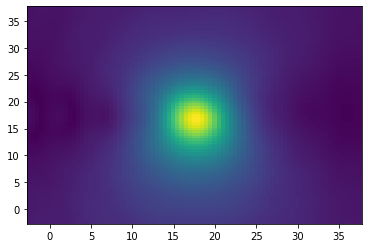

In [7]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DX),shading='auto')
plt.show()

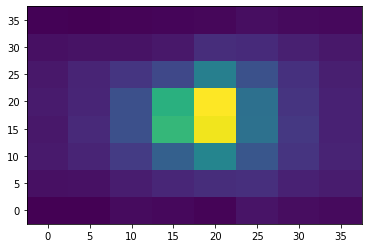

In [8]:
plt.pcolormesh(arr.X,arr.Y,flip(abs(arr.DX),axis = 1),shading='auto')
plt.show()

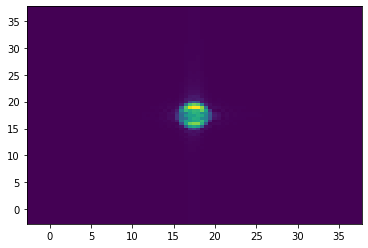

In [9]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(fft.fftshift(fft.fft2(fft.ifftshift(Eanal.DX)))),shading='auto')
plt.show()

In [10]:
T = reshape([i for i in range(64)],(8,8))
T

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

### Rotate counter clockwise

In [11]:
flip(T,axis = 1).T

array([[ 7, 15, 23, 31, 39, 47, 55, 63],
       [ 6, 14, 22, 30, 38, 46, 54, 62],
       [ 5, 13, 21, 29, 37, 45, 53, 61],
       [ 4, 12, 20, 28, 36, 44, 52, 60],
       [ 3, 11, 19, 27, 35, 43, 51, 59],
       [ 2, 10, 18, 26, 34, 42, 50, 58],
       [ 1,  9, 17, 25, 33, 41, 49, 57],
       [ 0,  8, 16, 24, 32, 40, 48, 56]])

### Rotate clockwise

In [12]:
flip(T,axis = 0).T

array([[56, 48, 40, 32, 24, 16,  8,  0],
       [57, 49, 41, 33, 25, 17,  9,  1],
       [58, 50, 42, 34, 26, 18, 10,  2],
       [59, 51, 43, 35, 27, 19, 11,  3],
       [60, 52, 44, 36, 28, 20, 12,  4],
       [61, 53, 45, 37, 29, 21, 13,  5],
       [62, 54, 46, 38, 30, 22, 14,  6],
       [63, 55, 47, 39, 31, 23, 15,  7]])

f = interpolate.interp2d(Eanal.X[0], Eanal.X[0]+0.5, Eanal.DY, kind='cubic')

Einterp = f(arr.X[0],arr.X[0])

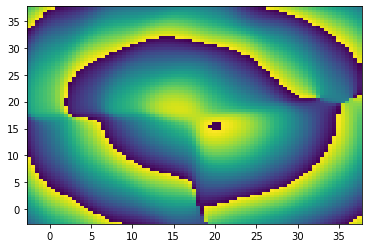

In [13]:
plt.pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DY),shading='auto')
plt.show()

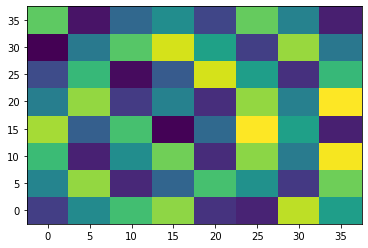

In [14]:
plt.pcolormesh(arr.X,arr.Y,angle(arr.DY),shading='auto')
plt.show()

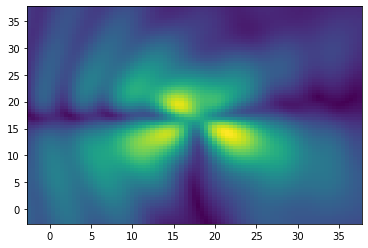

In [17]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DY),shading='auto')
plt.show()

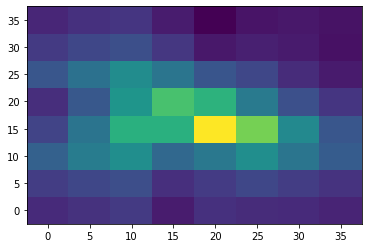

In [19]:
plt.pcolormesh(arr.X,arr.Y,abs(arr.DY),shading='auto')
plt.show()

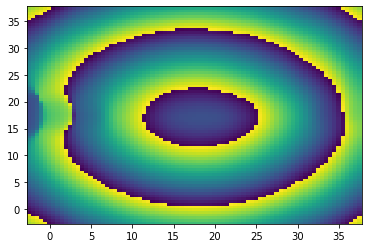

In [15]:
plt.pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DX),shading='auto')
plt.show()

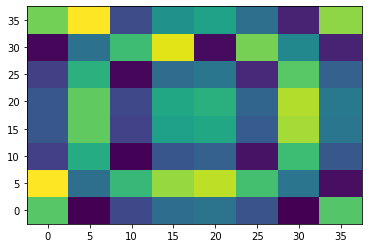

In [16]:
plt.pcolormesh(arr.X,arr.Y,flip(angle(arr.DX),axis = 1),shading='auto')
plt.show()